In [ ]:
import sys
from importlib import reload

import numpy as np
from numpy import fft

from matplotlib import pyplot as plt

sys.path.append("..")
import kse

reload(kse)

<module 'kse' from '/home/schilln/documents/research-data-assimilation/examples/kse.py'>

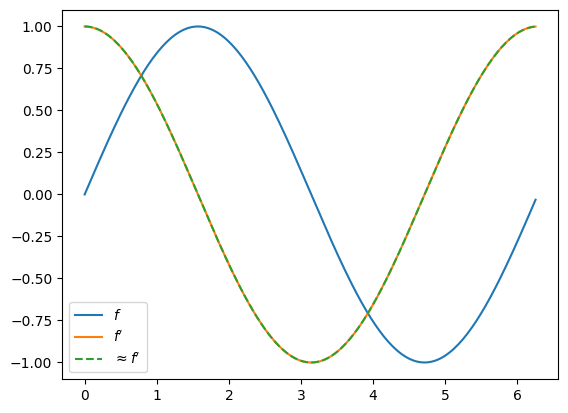

In [ ]:
f = lambda x: np.sin(x)
fp = lambda x: np.cos(x)

xlim = x0, xf = 0, 2 * np.pi
xn = 200
xls = np.linspace(*xlim, xn, endpoint=False)

y = f(xls)
yp = fp(xls)

d = kse.KSE(0, 0, 0, 0, 0, x0, xf, xn).d
approx_yp = fft.irfft(d(fft.rfft(y), 1))

plt.plot(xls, y, label="$f$")
plt.plot(xls, yp, label="$f'$")
plt.plot(xls, approx_yp, label=r"$\approx f'$", ls="--")
plt.legend()
plt.show()

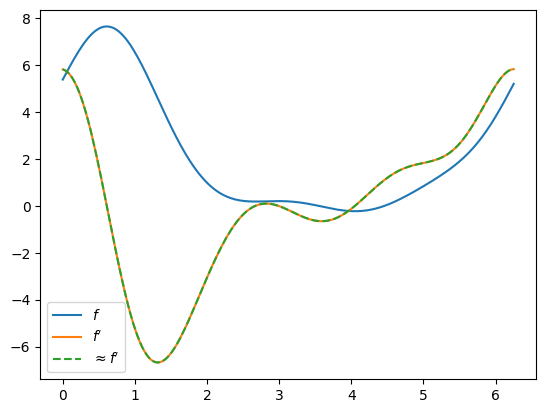

In [ ]:
f = lambda x: np.sin(x) ** 2 * np.cos(x) + np.exp(2 * np.sin(x + 1))
fp = (
    lambda x: 2 * np.sin(x) * np.cos(x) ** 2
    - np.sin(x) ** 3
    + 2 * np.cos(x + 1) * np.exp(2 * np.sin(x + 1))
)

xlim = x0, xf = 0, 2 * np.pi
xn = 200
xls = np.linspace(*xlim, xn, endpoint=False)

y = f(xls)
yp = fp(xls)

d = kse.KSE(0, 0, 0, 0, 0, x0, xf, xn).d
approx_yp = fft.irfft(d(fft.rfft(y), 1))

plt.plot(xls, y, label="$f$")
plt.plot(xls, yp, label="$f'$")
plt.plot(xls, approx_yp, label=r"$\approx f'$", ls="--")
plt.legend()
plt.show()

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,   0., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
         -2.,  -1.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
         -2.,  -1.]))

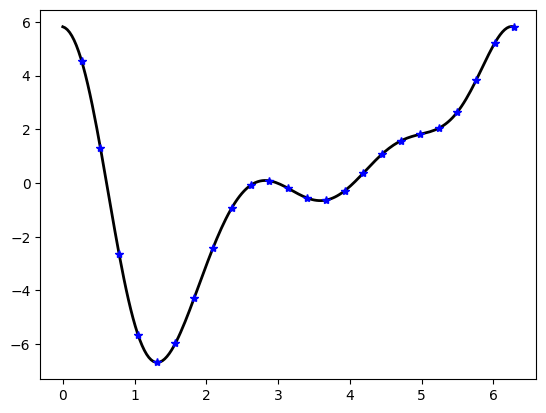

In [ ]:
N = 24
x1 = (2.0 * np.pi / N) * np.arange(1, N + 1)
f = np.sin(x1) ** 2.0 * np.cos(x1) + np.exp(2.0 * np.sin(x1 + 1))
# This array is reordered in Python to
# accomodate the ordering inside the fft function in scipy.
k = np.concatenate(
    (
        np.arange(0, N / 2),
        np.array([0]),  # Because hat{f}'(k) at k = N/2 is zero.
        np.arange(-N / 2 + 1, 0, 1),
    )
)
# Approximates the derivative using the pseudospectral method
f_hat = fft.fft(f)
fp_hat = (1j * k) * f_hat
fp = np.real(fft.ifft(fp_hat))
# Calculates the derivative analytically
x2 = np.linspace(0, 2 * np.pi, 200)
derivative = (
    2.0 * np.sin(x2) * np.cos(x2) ** 2.0
    - np.sin(x2) ** 3.0
    + 2 * np.cos(x2 + 1) * np.exp(2 * np.sin(x2 + 1))
)
plt.plot(x2, derivative, "-k", linewidth=2.0)
plt.plot(x1, fp, "*b")

k, fft.fftfreq(N, 2 * np.pi / N) * 2 * np.pi